## Covid19 in India - Data Analysis & Predictive Modeling

#### Using the states.csv data file provided by https://covid19india.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import missingno as mns

import warnings
warnings.filterwarnings('ignore')

In [2]:
covid_df = pd.read_csv('../Data/covid19indiaorg/states.csv')
covid_df.head(20)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
6,2020-02-14,Kerala,3,3,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
8,2020-02-20,Kerala,3,3,0,0,NaN
9,2020-02-20,Punjab,0,0,0,0,3675493.0


### Data Preparation and Feature Engineering

In [3]:
# Confirm that the data is till 31st of December
covid_df.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
10450,2020-12-31,Tripura,33261,32728,382,23,578723.0
10451,2020-12-31,India,10286310,9881732,149018,2861,173111994.0
10452,2020-12-31,Uttar Pradesh,584966,562459,8352,0,23943169.0
10453,2020-12-31,Uttarakhand,90920,83506,1509,1186,1777371.0
10454,2020-12-31,West Bengal,552063,530366,9712,0,7110430.0


In [4]:
# We will now create a new DF for India and work further with that
covid_ind_df = covid_df[covid_df['State'] == 'India']
covid_ind_df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
10,2020-02-20,India,3,3,0,0,NaN


In [5]:
# Check how many rows we have
covid_ind_df.shape

(310, 7)

In [6]:
covid_ind_df.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
10307,2020-12-27,India,10208725,9781945,147940,2812,168818354.0
10343,2020-12-28,India,10224797,9806767,148190,2825,169802049.0
10379,2020-12-29,India,10245339,9833356,148475,2837,170922330.0
10415,2020-12-30,India,10267284,9859763,148774,2852,172049574.0
10451,2020-12-31,India,10286310,9881732,149018,2861,173111994.0


In [7]:
# First, let's rename our columns
covid_ind_df.columns = ['date', 'region', 'total_confirmed', 'total_recovered', 'total_deceased', 'other', 'total_tested']
covid_ind_df.head()

,date,region,total_confirmed,total_recovered,total_deceased,other,total_tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
10,2020-02-20,India,3,3,0,0,NaN


In [8]:
# Get info
covid_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 10451
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             310 non-null    object 
 1   region           310 non-null    object 
 2   total_confirmed  310 non-null    int64  
 3   total_recovered  310 non-null    int64  
 4   total_deceased   310 non-null    int64  
 5   other            310 non-null    int64  
 6   total_tested     294 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 19.4+ KB


Feature 1: Create a new column for Active cases (active cases = total_confirmed - (total_recovered + total_deceased + other))

In [9]:
covid_ind_df['active'] = covid_ind_df['total_confirmed'] - (covid_ind_df['total_recovered'] + covid_ind_df['total_deceased']
                                                           + covid_ind_df['other'])
covid_ind_df['active']

1             1
3             2
5             3
7             0
10            0
          ...  
10307    276028
10343    267015
10379    260671
10415    255895
10451    252699
Name: active, Length: 310, dtype: int64

In [10]:
covid_ind_df.tail(20)

,date,region,total_confirmed,total_recovered,total_deceased,other,total_tested,active
9767,2020-12-12,India,9857380,9356879,143055,2546,153711833.0,354900
9803,2020-12-13,India,9884716,9387519,143393,2556,154566990.0,351248
9839,2020-12-14,India,9906657,9421940,143747,2573,155560655.0,338397
9875,2020-12-15,India,9932908,9455793,144131,2598,156646280.0,330386
9911,2020-12-16,India,9951080,9489153,144487,2623,157805240.0,314817
9947,2020-12-17,India,9977834,9520044,144829,2641,158918946.0,310320
9983,2020-12-18,India,10004825,9549923,145171,2662,160090814.0,307069
10019,2020-12-19,India,10031659,9579681,145513,2680,161198495.0,303785
10055,2020-12-20,India,10056281,9605415,145845,2692,162098629.0,302329
10091,2020-12-21,India,10075428,9635665,146147,2708,163170857.0,290908


In [11]:
# Delete the 'other' column
covid_ind_df = covid_ind_df.drop(['other'], axis = 1)
covid_ind_df

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active
1,2020-01-30,India,1,0,0,NaN,1
3,2020-02-02,India,2,0,0,NaN,2
5,2020-02-03,India,3,0,0,NaN,3
7,2020-02-14,India,3,3,0,NaN,0
10,2020-02-20,India,3,3,0,NaN,0
...,...,...,...,...,...,...,...
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,276028
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267015
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260671
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255895


Feature 2: Create new columns to store daily_confirmed, daily_recovered and daily_deceased cases

In [12]:
covid_ind_df['daily_confirmed'] = 0
covid_ind_df['daily_recovered'] = 0
covid_ind_df['daily_deceased'] = 0

covid_ind_df

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased
1,2020-01-30,India,1,0,0,NaN,1,0,0,0
3,2020-02-02,India,2,0,0,NaN,2,0,0,0
5,2020-02-03,India,3,0,0,NaN,3,0,0,0
7,2020-02-14,India,3,3,0,NaN,0,0,0,0
10,2020-02-20,India,3,3,0,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,276028,0,0,0
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267015,0,0,0
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260671,0,0,0
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255895,0,0,0


In [13]:
# Compute the values for daily_confirmed (subtract total_confirmed value of a row from the value of the previous row)
covid_ind_df['daily_confirmed'] = covid_ind_df['total_confirmed'] - covid_ind_df['daily_confirmed'].shift(1)
covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased
10127,2020-12-22,India,10099308,9662697,146476,164269021.0,287409,10099308.0,0,0
10163,2020-12-23,India,10124024,9692643,146791,165308666.0,281842,10124024.0,0,0
10199,2020-12-24,India,10147468,9717198,147128,166306062.0,280367,10147468.0,0,0
10235,2020-12-25,India,10169817,9739382,147379,167159589.0,280265,10169817.0,0,0
10271,2020-12-26,India,10188392,9760848,147659,168102957.0,277084,10188392.0,0,0
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,276028,10208725.0,0,0
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267015,10224797.0,0,0
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260671,10245339.0,0,0
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255895,10267284.0,0,0
10451,2020-12-31,India,10286310,9881732,149018,173111994.0,252699,10286310.0,0,0


In [14]:
# Compute the values for daily_recovered
covid_ind_df['daily_recovered'] = covid_ind_df['total_recovered'] - covid_ind_df['total_recovered'].shift(1)
covid_ind_df.tail(20)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased
9767,2020-12-12,India,9857380,9356879,143055,153711833.0,354900,9857380.0,33087.0,0
9803,2020-12-13,India,9884716,9387519,143393,154566990.0,351248,9884716.0,30640.0,0
9839,2020-12-14,India,9906657,9421940,143747,155560655.0,338397,9906657.0,34421.0,0
9875,2020-12-15,India,9932908,9455793,144131,156646280.0,330386,9932908.0,33853.0,0
9911,2020-12-16,India,9951080,9489153,144487,157805240.0,314817,9951080.0,33360.0,0
9947,2020-12-17,India,9977834,9520044,144829,158918946.0,310320,9977834.0,30891.0,0
9983,2020-12-18,India,10004825,9549923,145171,160090814.0,307069,10004825.0,29879.0,0
10019,2020-12-19,India,10031659,9579681,145513,161198495.0,303785,10031659.0,29758.0,0
10055,2020-12-20,India,10056281,9605415,145845,162098629.0,302329,10056281.0,25734.0,0
10091,2020-12-21,India,10075428,9635665,146147,163170857.0,290908,10075428.0,30250.0,0


In [15]:
# Compute values for daily_deceased
covid_ind_df['daily_deceased'] = covid_ind_df['total_deceased'] - covid_ind_df['total_deceased'].shift(1)
covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased
10127,2020-12-22,India,10099308,9662697,146476,164269021.0,287409,10099308.0,27032.0,329.0
10163,2020-12-23,India,10124024,9692643,146791,165308666.0,281842,10124024.0,29946.0,315.0
10199,2020-12-24,India,10147468,9717198,147128,166306062.0,280367,10147468.0,24555.0,337.0
10235,2020-12-25,India,10169817,9739382,147379,167159589.0,280265,10169817.0,22184.0,251.0
10271,2020-12-26,India,10188392,9760848,147659,168102957.0,277084,10188392.0,21466.0,280.0
10307,2020-12-27,India,10208725,9781945,147940,168818354.0,276028,10208725.0,21097.0,281.0
10343,2020-12-28,India,10224797,9806767,148190,169802049.0,267015,10224797.0,24822.0,250.0
10379,2020-12-29,India,10245339,9833356,148475,170922330.0,260671,10245339.0,26589.0,285.0
10415,2020-12-30,India,10267284,9859763,148774,172049574.0,255895,10267284.0,26407.0,299.0
10451,2020-12-31,India,10286310,9881732,149018,173111994.0,252699,10286310.0,21969.0,244.0


In [16]:
# Check Null Values
covid_ind_df.isnull().sum()

date                0
region              0
total_confirmed     0
total_recovered     0
total_deceased      0
total_tested       16
active              0
daily_confirmed     1
daily_recovered     1
daily_deceased      1
dtype: int64

In [17]:
# Drop all null values
covid_ind_df = covid_ind_df.dropna()

In [18]:
covid_ind_df.isnull().sum()

date               0
region             0
total_confirmed    0
total_recovered    0
total_deceased     0
total_tested       0
active             0
daily_confirmed    0
daily_recovered    0
daily_deceased     0
dtype: int64

In [19]:
# Try to convert float columns to int
covid_ind_df['daily_confirmed'] = covid_ind_df['daily_confirmed'].astype('int')

In [20]:
covid_ind_df['total_tested'] = covid_ind_df['total_tested'].astype('int')

In [21]:
covid_ind_df['daily_recovered'] = covid_ind_df['daily_recovered'].astype('int')

In [22]:
covid_ind_df['daily_deceased'] = covid_ind_df['daily_deceased'].astype('int')

In [23]:
covid_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             294 non-null    object
 1   region           294 non-null    object
 2   total_confirmed  294 non-null    int64 
 3   total_recovered  294 non-null    int64 
 4   total_deceased   294 non-null    int64 
 5   total_tested     294 non-null    int32 
 6   active           294 non-null    int64 
 7   daily_confirmed  294 non-null    int32 
 8   daily_recovered  294 non-null    int32 
 9   daily_deceased   294 non-null    int32 
dtypes: int32(4), int64(4), object(2)
memory usage: 20.7+ KB


Feature 3: Create a new column to store daily_tests

In [24]:
covid_ind_df['daily_tested'] = covid_ind_df['total_tested'] - covid_ind_df['total_tested'].shift(1)
covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested
10127,2020-12-22,India,10099308,9662697,146476,164269021,287409,10099308,27032,329,1098164.0
10163,2020-12-23,India,10124024,9692643,146791,165308666,281842,10124024,29946,315,1039645.0
10199,2020-12-24,India,10147468,9717198,147128,166306062,280367,10147468,24555,337,997396.0
10235,2020-12-25,India,10169817,9739382,147379,167159589,280265,10169817,22184,251,853527.0
10271,2020-12-26,India,10188392,9760848,147659,168102957,277084,10188392,21466,280,943368.0
10307,2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397.0
10343,2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695.0
10379,2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281.0
10415,2020-12-30,India,10267284,9859763,148774,172049574,255895,10267284,26407,299,1127244.0
10451,2020-12-31,India,10286310,9881732,149018,173111994,252699,10286310,21969,244,1062420.0


In [25]:
# Check if there are '0' tests on any given day
no_tests = covid_ind_df[covid_ind_df['daily_tested'] == 0]
no_tests

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested
146,2020-03-14,India,102,3,1,6500,95,102,0,0,0.0
161,2020-03-15,India,112,3,1,6500,105,112,0,0,0.0
178,2020-03-16,India,126,3,1,6500,119,126,0,0,0.0
196,2020-03-17,India,146,3,1,6500,139,146,0,0,0.0
439,2020-03-27,India,883,8,3,27688,869,883,2,1,0.0
467,2020-03-28,India,1019,8,3,27688,1005,1019,0,0,0.0
495,2020-03-29,India,1139,99,28,27688,1009,1139,91,25,0.0
1222,2020-04-20,India,18544,3273,593,401586,14675,18544,419,33,0.0


'0' daily tests basically means that the total tests were the same as the previous day. For example, tests done on two consecutive days would be the same - let's say 100000. In this case the increase or decrease in the number of daily tests is 0. If on the first day, the positivity rate is calculated, then perhaps we should use the same daily tests value to calculate positiviy rate for second day. We will come back to this later...

Feature 4: Create a new column to store overall recovery rate

In [26]:
covid_ind_df['trr'] = np.round((covid_ind_df['total_recovered'] / covid_ind_df['total_confirmed'] * 100), 2)
covid_ind_df['trr']

131       3.30
146       2.94
161       2.68
178       2.38
196       2.05
         ...  
10307    95.82
10343    95.91
10379    95.98
10415    96.03
10451    96.07
Name: trr, Length: 294, dtype: float64

Feature 5: Create a new column to store overall positivity rate

In [27]:
covid_ind_df['tpr'] = np.round((covid_ind_df['total_confirmed'] / covid_ind_df['total_tested'] * 100), 2)
covid_ind_df['tpr']

131      1.40
146      1.57
161      1.72
178      1.94
196      2.25
         ... 
10307    6.05
10343    6.02
10379    5.99
10415    5.97
10451    5.94
Name: tpr, Length: 294, dtype: float64

In [28]:
covid_ind_df.shape

(294, 13)

In [29]:
covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr
10127,2020-12-22,India,10099308,9662697,146476,164269021,287409,10099308,27032,329,1098164.0,95.68,6.15
10163,2020-12-23,India,10124024,9692643,146791,165308666,281842,10124024,29946,315,1039645.0,95.74,6.12
10199,2020-12-24,India,10147468,9717198,147128,166306062,280367,10147468,24555,337,997396.0,95.76,6.10
10235,2020-12-25,India,10169817,9739382,147379,167159589,280265,10169817,22184,251,853527.0,95.77,6.08
10271,2020-12-26,India,10188392,9760848,147659,168102957,277084,10188392,21466,280,943368.0,95.80,6.06
10307,2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397.0,95.82,6.05
10343,2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695.0,95.91,6.02
10379,2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281.0,95.98,5.99
10415,2020-12-30,India,10267284,9859763,148774,172049574,255895,10267284,26407,299,1127244.0,96.03,5.97
10451,2020-12-31,India,10286310,9881732,149018,173111994,252699,10286310,21969,244,1062420.0,96.07,5.94


Feature 6: Create a new column to store overall case fatality rate

In [30]:
covid_ind_df['cfr'] = np.round((covid_ind_df['total_deceased'] / covid_ind_df['total_confirmed'] * 100), 2)
covid_ind_df['cfr']

131      1.10
146      0.98
161      0.89
178      0.79
196      0.68
         ... 
10307    1.45
10343    1.45
10379    1.45
10415    1.45
10451    1.45
Name: cfr, Length: 294, dtype: float64

In [31]:
covid_ind_df.shape

(294, 14)

In [32]:
covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr
10127,2020-12-22,India,10099308,9662697,146476,164269021,287409,10099308,27032,329,1098164.0,95.68,6.15,1.45
10163,2020-12-23,India,10124024,9692643,146791,165308666,281842,10124024,29946,315,1039645.0,95.74,6.12,1.45
10199,2020-12-24,India,10147468,9717198,147128,166306062,280367,10147468,24555,337,997396.0,95.76,6.10,1.45
10235,2020-12-25,India,10169817,9739382,147379,167159589,280265,10169817,22184,251,853527.0,95.77,6.08,1.45
10271,2020-12-26,India,10188392,9760848,147659,168102957,277084,10188392,21466,280,943368.0,95.80,6.06,1.45
10307,2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397.0,95.82,6.05,1.45
10343,2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695.0,95.91,6.02,1.45
10379,2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281.0,95.98,5.99,1.45
10415,2020-12-30,India,10267284,9859763,148774,172049574,255895,10267284,26407,299,1127244.0,96.03,5.97,1.45
10451,2020-12-31,India,10286310,9881732,149018,173111994,252699,10286310,21969,244,1062420.0,96.07,5.94,1.45


Convert date column to datetime type

In [33]:
covid_ind_df['date'] = pd.to_datetime(covid_ind_df.date)
covid_ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 131 to 10451
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             294 non-null    datetime64[ns]
 1   region           294 non-null    object        
 2   total_confirmed  294 non-null    int64         
 3   total_recovered  294 non-null    int64         
 4   total_deceased   294 non-null    int64         
 5   total_tested     294 non-null    int32         
 6   active           294 non-null    int64         
 7   daily_confirmed  294 non-null    int32         
 8   daily_recovered  294 non-null    int32         
 9   daily_deceased   294 non-null    int32         
 10  daily_tested     293 non-null    float64       
 11  trr              294 non-null    float64       
 12  tpr              294 non-null    float64       
 13  cfr              294 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int3

In [34]:
# Let's extract month, weekday and create new columns for them
covid_ind_df['month'] = pd.DatetimeIndex(covid_ind_df.date).month
covid_ind_df['weekday'] = pd.DatetimeIndex(covid_ind_df.date).weekday

covid_ind_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
10127,2020-12-22,India,10099308,9662697,146476,164269021,287409,10099308,27032,329,1098164.0,95.68,6.15,1.45,12,1
10163,2020-12-23,India,10124024,9692643,146791,165308666,281842,10124024,29946,315,1039645.0,95.74,6.12,1.45,12,2
10199,2020-12-24,India,10147468,9717198,147128,166306062,280367,10147468,24555,337,997396.0,95.76,6.10,1.45,12,3
10235,2020-12-25,India,10169817,9739382,147379,167159589,280265,10169817,22184,251,853527.0,95.77,6.08,1.45,12,4
10271,2020-12-26,India,10188392,9760848,147659,168102957,277084,10188392,21466,280,943368.0,95.80,6.06,1.45,12,5
10307,2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397.0,95.82,6.05,1.45,12,6
10343,2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695.0,95.91,6.02,1.45,12,0
10379,2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281.0,95.98,5.99,1.45,12,1
10415,2020-12-30,India,10267284,9859763,148774,172049574,255895,10267284,26407,299,1127244.0,96.03,5.97,1.45,12,2
10451,2020-12-31,India,10286310,9881732,149018,173111994,252699,10286310,21969,244,1062420.0,96.07,5.94,1.45,12,3


### Test Section - Delete Later

In [35]:
copy_df = covid_ind_df.copy()

In [36]:
copy_df.isnull().sum()

date               0
region             0
total_confirmed    0
total_recovered    0
total_deceased     0
total_tested       0
active             0
daily_confirmed    0
daily_recovered    0
daily_deceased     0
daily_tested       1
trr                0
tpr                0
cfr                0
month              0
weekday            0
dtype: int64

In [37]:
copy_df = copy_df.fillna(0)
copy_df.head(20)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
131,2020-03-13,India,91,3,1,6500,87,91,0,1,0.0,3.30,1.40,1.10,3,4
146,2020-03-14,India,102,3,1,6500,95,102,0,0,0.0,2.94,1.57,0.98,3,5
161,2020-03-15,India,112,3,1,6500,105,112,0,0,0.0,2.68,1.72,0.89,3,6
178,2020-03-16,India,126,3,1,6500,119,126,0,0,0.0,2.38,1.94,0.79,3,0
196,2020-03-17,India,146,3,1,6500,139,146,0,0,0.0,2.05,2.25,0.68,3,1
215,2020-03-18,India,171,3,1,13125,164,171,0,0,6625.0,1.75,1.30,0.58,3,2
237,2020-03-19,India,198,3,1,14175,191,198,0,0,1050.0,1.52,1.40,0.51,3,3
260,2020-03-20,India,256,4,1,15404,248,256,1,0,1229.0,1.56,1.66,0.39,3,4
283,2020-03-21,India,334,4,1,16911,326,334,0,0,1507.0,1.20,1.98,0.30,3,5
307,2020-03-22,India,403,4,1,18127,395,403,0,0,1216.0,0.99,2.22,0.25,3,6


In [38]:
len(copy_df)

294

In [39]:
copy_df.loc[131, 'daily_tested']

0.0

In [40]:
copy_df = copy_df.reset_index(drop=True)
copy_df.head(20)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
0,2020-03-13,India,91,3,1,6500,87,91,0,1,0.0,3.30,1.40,1.10,3,4
1,2020-03-14,India,102,3,1,6500,95,102,0,0,0.0,2.94,1.57,0.98,3,5
2,2020-03-15,India,112,3,1,6500,105,112,0,0,0.0,2.68,1.72,0.89,3,6
3,2020-03-16,India,126,3,1,6500,119,126,0,0,0.0,2.38,1.94,0.79,3,0
4,2020-03-17,India,146,3,1,6500,139,146,0,0,0.0,2.05,2.25,0.68,3,1
5,2020-03-18,India,171,3,1,13125,164,171,0,0,6625.0,1.75,1.30,0.58,3,2
6,2020-03-19,India,198,3,1,14175,191,198,0,0,1050.0,1.52,1.40,0.51,3,3
7,2020-03-20,India,256,4,1,15404,248,256,1,0,1229.0,1.56,1.66,0.39,3,4
8,2020-03-21,India,334,4,1,16911,326,334,0,0,1507.0,1.20,1.98,0.30,3,5
9,2020-03-22,India,403,4,1,18127,395,403,0,0,1216.0,0.99,2.22,0.25,3,6


In [41]:
copy_df['daily_tested'] = copy_df['daily_tested'].astype('int')

In [42]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             294 non-null    datetime64[ns]
 1   region           294 non-null    object        
 2   total_confirmed  294 non-null    int64         
 3   total_recovered  294 non-null    int64         
 4   total_deceased   294 non-null    int64         
 5   total_tested     294 non-null    int32         
 6   active           294 non-null    int64         
 7   daily_confirmed  294 non-null    int32         
 8   daily_recovered  294 non-null    int32         
 9   daily_deceased   294 non-null    int32         
 10  daily_tested     294 non-null    int32         
 11  trr              294 non-null    float64       
 12  tpr              294 non-null    float64       
 13  cfr              294 non-null    float64       
 14  month            294 non-null    int64    

In [43]:
zero_tests = copy_df['daily_tested'] == 0
zero_tests

0       True
1       True
2       True
3       True
4       True
       ...  
289    False
290    False
291    False
292    False
293    False
Name: daily_tested, Length: 294, dtype: bool

In [44]:
for i in range(len(copy_df)):
    if copy_df.loc[i, 'daily_tested'] == 0 and i > 0:
        copy_df.loc[i, 'daily_tested'] = copy_df.loc[i-1, 'daily_tested']

In [45]:
copy_df.head(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
0,2020-03-13,India,91,3,1,6500,87,91,0,1,0,3.30,1.40,1.10,3,4
1,2020-03-14,India,102,3,1,6500,95,102,0,0,0,2.94,1.57,0.98,3,5
2,2020-03-15,India,112,3,1,6500,105,112,0,0,0,2.68,1.72,0.89,3,6
3,2020-03-16,India,126,3,1,6500,119,126,0,0,0,2.38,1.94,0.79,3,0
4,2020-03-17,India,146,3,1,6500,139,146,0,0,0,2.05,2.25,0.68,3,1
5,2020-03-18,India,171,3,1,13125,164,171,0,0,6625,1.75,1.30,0.58,3,2
6,2020-03-19,India,198,3,1,14175,191,198,0,0,1050,1.52,1.40,0.51,3,3
7,2020-03-20,India,256,4,1,15404,248,256,1,0,1229,1.56,1.66,0.39,3,4
8,2020-03-21,India,334,4,1,16911,326,334,0,0,1507,1.20,1.98,0.30,3,5
9,2020-03-22,India,403,4,1,18127,395,403,0,0,1216,0.99,2.22,0.25,3,6


In [46]:
copy1_df = copy_df.iloc[5:]
copy1_df.head(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
5,2020-03-18,India,171,3,1,13125,164,171,0,0,6625,1.75,1.30,0.58,3,2
6,2020-03-19,India,198,3,1,14175,191,198,0,0,1050,1.52,1.40,0.51,3,3
7,2020-03-20,India,256,4,1,15404,248,256,1,0,1229,1.56,1.66,0.39,3,4
8,2020-03-21,India,334,4,1,16911,326,334,0,0,1507,1.20,1.98,0.30,3,5
9,2020-03-22,India,403,4,1,18127,395,403,0,0,1216,0.99,2.22,0.25,3,6
10,2020-03-23,India,497,4,1,20707,489,497,0,0,2580,0.80,2.40,0.20,3,0
11,2020-03-24,India,571,6,1,22694,561,571,2,0,1987,1.05,2.52,0.18,3,1
12,2020-03-25,India,657,6,1,25144,647,657,0,0,2450,0.91,2.61,0.15,3,2
13,2020-03-26,India,730,6,2,27688,719,730,0,1,2544,0.82,2.64,0.27,3,3
14,2020-03-27,India,883,8,3,27688,869,883,2,1,2544,0.91,3.19,0.34,3,4


In [47]:
copy1_df['daily_tested'] == 0

5      False
6      False
7      False
8      False
9      False
       ...  
289    False
290    False
291    False
292    False
293    False
Name: daily_tested, Length: 289, dtype: bool

In [48]:
copy_df = copy1_df.reset_index(drop=True)
copy_df.head(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
0,2020-03-18,India,171,3,1,13125,164,171,0,0,6625,1.75,1.30,0.58,3,2
1,2020-03-19,India,198,3,1,14175,191,198,0,0,1050,1.52,1.40,0.51,3,3
2,2020-03-20,India,256,4,1,15404,248,256,1,0,1229,1.56,1.66,0.39,3,4
3,2020-03-21,India,334,4,1,16911,326,334,0,0,1507,1.20,1.98,0.30,3,5
4,2020-03-22,India,403,4,1,18127,395,403,0,0,1216,0.99,2.22,0.25,3,6
5,2020-03-23,India,497,4,1,20707,489,497,0,0,2580,0.80,2.40,0.20,3,0
6,2020-03-24,India,571,6,1,22694,561,571,2,0,1987,1.05,2.52,0.18,3,1
7,2020-03-25,India,657,6,1,25144,647,657,0,0,2450,0.91,2.61,0.15,3,2
8,2020-03-26,India,730,6,2,27688,719,730,0,1,2544,0.82,2.64,0.27,3,3
9,2020-03-27,India,883,8,3,27688,869,883,2,1,2544,0.91,3.19,0.34,3,4


In [49]:
copy_month_df = copy_df.groupby('month')[['total_confirmed', 'total_recovered', 'total_deceased', 'total_tested']].sum()
copy_month_df.head

<bound method NDFrame.head of        total_confirmed  total_recovered  total_deceased  total_tested
month                                                                
3                 9819              456             132  3.382690e+05
4               449254            86229           14504  1.051370e+07
5              3089437          1217126           94240  7.092935e+07
6             10963515          5924314          332074  1.850991e+08
7             32864193         20744773          813249  4.164115e+08
8             82700428         60296607         1585652  9.476726e+08
9            151659288        120936663         2478009  1.795602e+09
10           228590706        200960926         3482168  2.892967e+09
11           265831564        247560479         3910865  3.786104e+09
12           308009453        293215492         4469880  4.894751e+09>

In [50]:
copy_df = copy_df[copy_df['month'] != 1]
copy_df.tail(10)

,date,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
279,2020-12-22,India,10099308,9662697,146476,164269021,287409,10099308,27032,329,1098164,95.68,6.15,1.45,12,1
280,2020-12-23,India,10124024,9692643,146791,165308666,281842,10124024,29946,315,1039645,95.74,6.12,1.45,12,2
281,2020-12-24,India,10147468,9717198,147128,166306062,280367,10147468,24555,337,997396,95.76,6.10,1.45,12,3
282,2020-12-25,India,10169817,9739382,147379,167159589,280265,10169817,22184,251,853527,95.77,6.08,1.45,12,4
283,2020-12-26,India,10188392,9760848,147659,168102957,277084,10188392,21466,280,943368,95.80,6.06,1.45,12,5
284,2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397,95.82,6.05,1.45,12,6
285,2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695,95.91,6.02,1.45,12,0
286,2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281,95.98,5.99,1.45,12,1
287,2020-12-30,India,10267284,9859763,148774,172049574,255895,10267284,26407,299,1127244,96.03,5.97,1.45,12,2
288,2020-12-31,India,10286310,9881732,149018,173111994,252699,10286310,21969,244,1062420,96.07,5.94,1.45,12,3


In [51]:
month_daily = copy_df.groupby('month')[['daily_confirmed', 'daily_recovered', 'daily_deceased', 'daily_tested']].sum()
month_daily

,daily_confirmed,daily_recovered,daily_deceased,daily_tested
month,,,,
3,9819,157,46,43920
4,449254,8899,1107,889329
5,3089437,82803,4251,2934553
6,10963515,255979,12005,4989378
7,32864193,747708,19146,10532074
8,82700428,1741832,28879,23966175
9,151659288,2432634,33273,32294947
10,228590706,2219578,23443,34267522
11,265831564,1399002,15508,31461998


In [52]:
month_total = copy_df.groupby('month')[['total_confirmed', 'total_recovered', 'total_deceased']].sum()
month_total

,total_confirmed,total_recovered,total_deceased
month,,,
3,9819,456,132
4,449254,86229,14504
5,3089437,1217126,94240
6,10963515,5924314,332074
7,32864193,20744773,813249
8,82700428,60296607,1585652
9,151659288,120936663,2478009
10,228590706,200960926,3482168
11,265831564,247560479,3910865


In [53]:
month_rr = copy_df.groupby('month')[['trr']].mean()
month_rr

,trr
month,
3,2.957857
4,15.054667
5,36.500323
6,52.776000
7,62.766452
8,72.135161
9,79.428667
10,87.735806
11,93.102333


In [54]:
copy1_df = copy_df.copy()

In [55]:
copy1_df.set_index('date', inplace=True)
copy1_df

,region,total_confirmed,total_recovered,total_deceased,total_tested,active,daily_confirmed,daily_recovered,daily_deceased,daily_tested,trr,tpr,cfr,month,weekday
date,,,,,,,,,,,,,,,
2020-03-18,India,171,3,1,13125,164,171,0,0,6625,1.75,1.30,0.58,3,2
2020-03-19,India,198,3,1,14175,191,198,0,0,1050,1.52,1.40,0.51,3,3
2020-03-20,India,256,4,1,15404,248,256,1,0,1229,1.56,1.66,0.39,3,4
2020-03-21,India,334,4,1,16911,326,334,0,0,1507,1.20,1.98,0.30,3,5
2020-03-22,India,403,4,1,18127,395,403,0,0,1216,0.99,2.22,0.25,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,India,10208725,9781945,147940,168818354,276028,10208725,21097,281,715397,95.82,6.05,1.45,12,6
2020-12-28,India,10224797,9806767,148190,169802049,267015,10224797,24822,250,983695,95.91,6.02,1.45,12,0
2020-12-29,India,10245339,9833356,148475,170922330,260671,10245339,26589,285,1120281,95.98,5.99,1.45,12,1


<AxesSubplot:xlabel='date'>

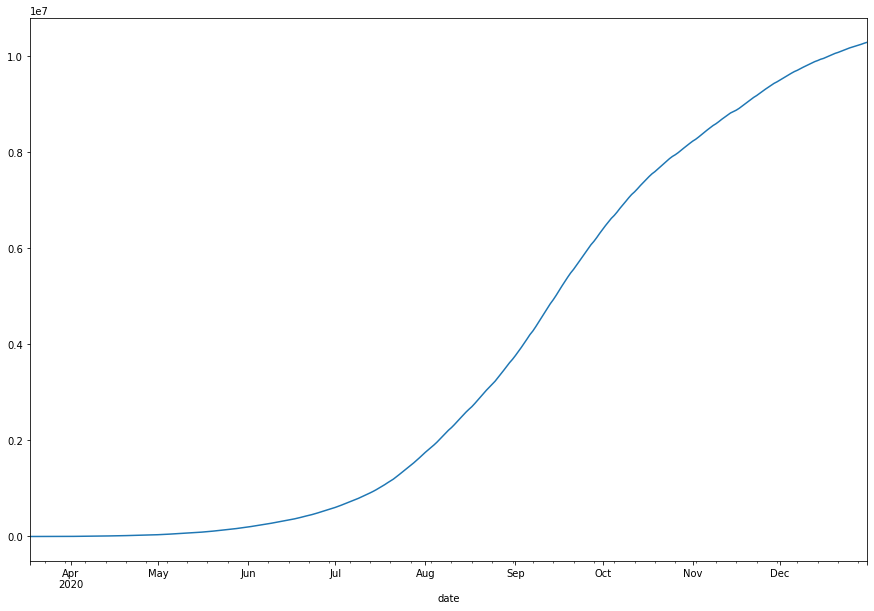

In [56]:
copy1_df.daily_confirmed.plot(figsize=(15,10))

In [57]:
columns = ['total_confirmed', 'total_recovered', 'total_deceased']
tot_df = copy1_df[columns]
tot_df

,total_confirmed,total_recovered,total_deceased
date,,,
2020-03-18,171,3,1
2020-03-19,198,3,1
2020-03-20,256,4,1
2020-03-21,334,4,1
2020-03-22,403,4,1
...,...,...,...
2020-12-27,10208725,9781945,147940
2020-12-28,10224797,9806767,148190
2020-12-29,10245339,9833356,148475


In [58]:
tot_df.columns = ['Total Confirmed', 'Total Recovered', 'Total Deceased']
tot_df

,Total Confirmed,Total Recovered,Total Deceased
date,,,
2020-03-18,171,3,1
2020-03-19,198,3,1
2020-03-20,256,4,1
2020-03-21,334,4,1
2020-03-22,403,4,1
...,...,...,...
2020-12-27,10208725,9781945,147940
2020-12-28,10224797,9806767,148190
2020-12-29,10245339,9833356,148475


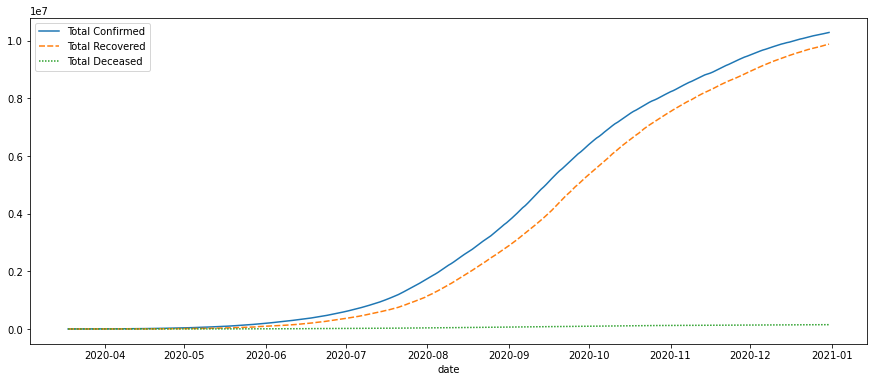

In [59]:
plt.figure(figsize=(15,6))
sns.lineplot(data=tot_df);

In [60]:
d_columns = ['daily_confirmed', 'daily_recovered', 'daily_deceased']
daily_df = copy1_df[d_columns]

<AxesSubplot:xlabel='date'>

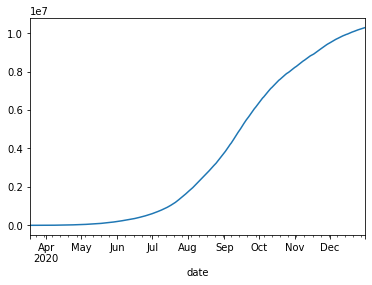

In [64]:
copy1_df['daily_confirmed'].plot()

<AxesSubplot:xlabel='date'>

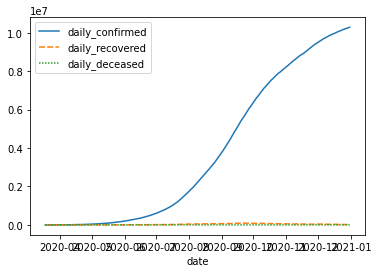

In [63]:
sns.lineplot(data = daily_df)